# APS1070
#### Linear Regression - Project 4

Please fill out the following:


*   Your **name**: Yixiao Hong
*   Your **student number**: 1001311145

## How to use this Notebook

1. Run the cells to get a bird's eye view of whats going on.
2. Interact with the code to better understand how it works - add cells, plot values, change parameters, etc.
3. (Optional) Replicate Linear Regression code on a blank notebook, without viewing this code. [This is called retrieval practice.](https://www.learningscientists.org/blog/2016/6/23-1)
4. Complete exercises.

## Linear Regression - Introduction

### Linear Regression

In statistics, linear regression is a linear approach to modelling the relationship between a dependent variable and one or more independent variables. Let X be the independent variable and Y be the dependent variable. We will define a linear relationship between these two variables as follows:

$y = mX + c$

This is the equation for a line that you studied in high school. m is the slope of the line and c is the y intercept. Today we will use this equation to train our model with a given dataset and predict the value of Y for any given value of X. Our challenge today is to determine the value of m and c, such that the line corresponding to those values is the best fitting line or gives the minimum error.

Are we always fitting a line into the data? What if we have more than 1 feature (independant variable)?

The vectorized form of above equation is written as $y = Xw$, where y and w are vectors while X is a matrix. 

Where is the c term? It is included within the X matrix.

**Hypothesis of Linear Regression**

The linear regression model can be represented by the following equation:

<img src="https://miro.medium.com/max/313/1*A32yDrkQKIU0Z-Nf7JD9Pg.png">

- Y is the predicted value ($h_\theta(x)$)
- θ₀ is the bias term.
- θ₁,…,θₙ are the model parameters
- x₁, x₂,…,xₙ are the feature values.

### LR - Procedure

Our Loss function for Linear regression would be sum of squares, which makes the cost function to be:

<img src="https://miro.medium.com/max/300/1*_y5QA1yF4w6LDDRxfTt6GA.jpeg">

Here yᵢ is the actual value and ȳᵢ is the predicted value. Lets substitute the value of ȳᵢ from $y = mX + c$:

<img src="https://miro.medium.com/max/400/1*3cpC7oHy4IbH3o3Jc-ygVw.jpeg">

Partial Derivative of the above equation with respect to m is shown as $D_m$:

<img src="https://miro.medium.com/max/400/1*FvYfCBrl2gX9K-KxSO1eIw.jpeg">

While the Partial Derivative with respect to c is shown as $D_c$:

<img src="https://miro.medium.com/max/300/1*rj09w2TcBxnHPtQ0oq4ehA.jpeg">

#### Analytical Approach for Linear Regression

Can you derive the Analytical Solution for Linear Regression?

We arrive at the analytical solution when we turn the partial derivatives with respect to the parameters to zero. Why?

This is because at the point where cost function is at the minimum with respect to the parameters (m and c), the derivative of cost function with respect to the parameters would be zero.

$D_m=0$ and $D_c=0$

The solution for the general case comes out to be:

<img src="https://sebastianraschka.com/images/faq/closed-form-vs-gd/closed-form.png">

With $L_2$ Regularization. Cost:

$J(\theta) = \frac{1}{2m}[\sum_{i=1}^m(h_\theta (x^{(i)}) - y^{(i)})^2 + \lambda\sum_{j=1}^n\theta^2_j]$

$w = (X^TX + \lambda I)^{-1}X^Ty$

#### Gradient Descent Solution

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters m and c. 

<img src="https://miro.medium.com/max/300/1*JDcHqFK8jLcgQu1cj2XuVQ.jpeg">

Here the term $L$ is defined as the learning rate.

<img src="https://miro.medium.com/max/864/1*CjTBNFUEI_IokEOXJ00zKw.gif">

#### Any other solutions methods?

Some other solution methods are QR Decomposition, Singular-Value Decomposition.

- Do these methods give exact solutions?
- Do these methods scale well with large datasets?

## Let's Start

Single Feature, 5 data points.

### Analytical Approach in Code

Let's get our hands dirty.

In [0]:
#import libs
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import mean_squared_error

In [0]:
n = 5 # number of points
m = 2 # slope of line
c = 4 # y intercept of line
r = 2 # range of data on x-axis

np.random.seed(2)
x = r * np.random.rand(n) 7 days a w
x.sort()
print("random x sorted:",x)
yPerf = m*x + c # perfect world: no noise
print("yPerf :",yPerf)
y = m*x + c + np.random.randn(n) # imperfect world: we get noisy data
print("y :",y)

random x sorted: [0.05185246 0.8407356  0.87064479 0.8719898  1.09932496]
yPerf : [4.10370493 5.68147121 5.74128957 5.74397961 6.19864991]
y : [3.02924941 5.0642481  4.2402827  6.63756941 6.93819559]


Spoiler Alert: We are in an Imperfect World.

In [0]:
def rmse(yPred, y):
    return np.sqrt(mean_squared_error(yPred, y))

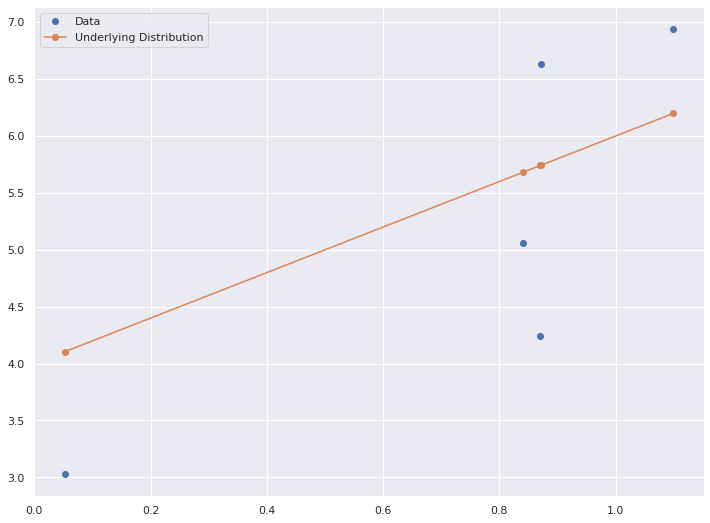

In [0]:
plt.plot(x, y, 'o', label='Data')
plt.plot(x, yPerf, 'o-', label='Underlying Distribution')
plt.legend()
plt.show()

In [0]:
x = np.vstack((np.ones(np.shape(x)), x)).T
y = y.reshape(-1, 1)
print("x=",x,"\ny=",y)

x= [[1.         0.05185246]
 [1.         0.8407356 ]
 [1.         0.87064479]
 [1.         0.8719898 ]
 [1.         1.09932496]] 
y= [[3.02924941]
 [5.0642481 ]
 [4.2402827 ]
 [6.63756941]
 [6.93819559]]


In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
# prediction
yPred = np.dot(x, w)
print("w=",w,"\nyPred=",yPred)

w= [[2.67741212]
 [3.35314632]] 
yPred= [[2.85128102]
 [5.49652162]
 [5.59681148]
 [5.60132153]
 [6.36360955]]


In [0]:
w[0], w[1]

(array([2.67741212]), array([3.35314632]))

- How similar are these to the values we had set initially?
- Will they be same as those set initially if there was no noise?

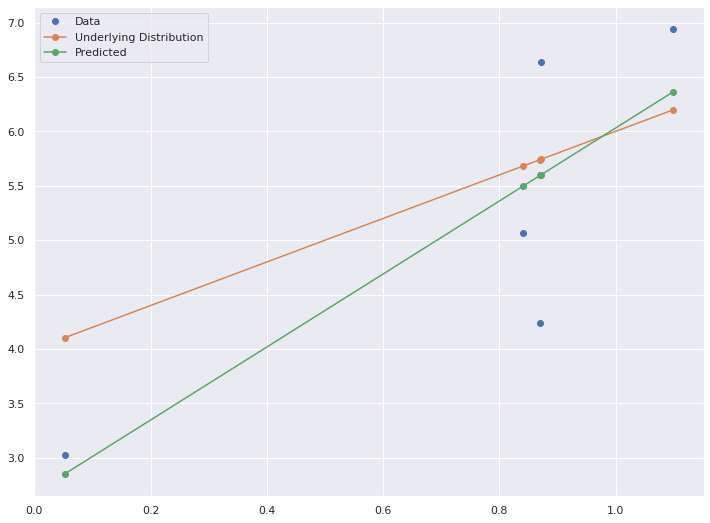

In [0]:
plt.plot(x[:, 1], y, 'o', label='Data')
plt.plot(x[:, 1], yPerf, 'o-', label='Underlying Distribution')
plt.plot(x[:, 1], yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  0.8321853483360432


### Complex Dependant Variable

It's complicated.

In [0]:
n = 20 # number of points
m = 3  # slope of line
c = 10 # y intercept of line
r = 2  # range of data on x-axis

np.random.seed(10)
X = xD = r * np.random.randn(n) # points also stored in xD (xData). will be useful later.
X.sort()
yPerf = X - 2 * (X ** 2) + 0.5 * (X ** 3)
np.random.seed(10)
y = X - 2 * (X ** 2) + 0.5 * (X ** 3) + np.random.normal(0, 5, n) # imperfect world: we get noisy data

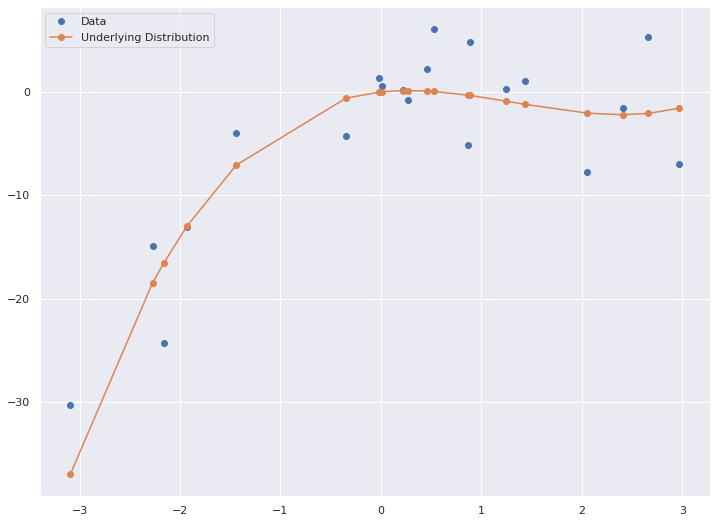

In [0]:
plt.plot(X, y, 'o', label='Data')
plt.plot(X, yPerf, 'o-', label='Underlying Distribution')

plt.legend()
plt.show()

In [0]:
X = np.vstack((np.ones(np.shape(X)), X)).T
#ones + x
y = y.reshape(-1, 1)

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPredLinear = yPred = np.dot(X, w)

w

array([[-5.45917353],
       [ 3.82202654]])

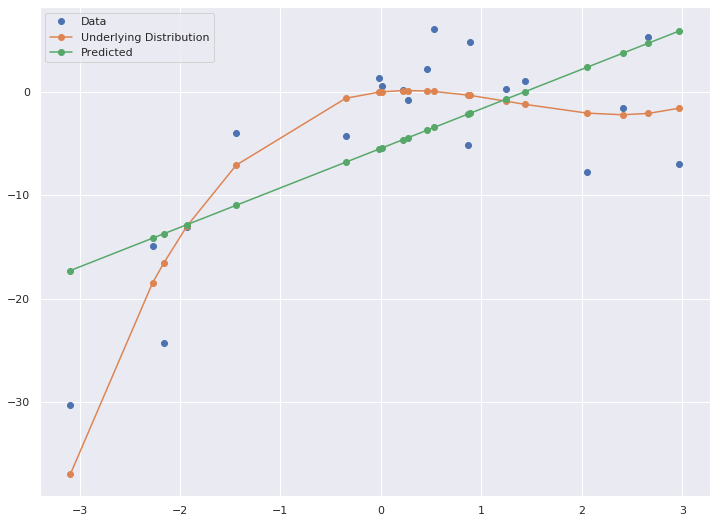

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  6.839531223681816


#### What to do next?

Can we add more features.

In [0]:
X = np.vstack((X.T, xD**2, xD**3)).T
#try cubic function

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred4Feature = yPred = np.dot(X, w)

In [0]:
w

array([[ 0.04177438],
       [ 2.58652514],
       [-1.87142105],
       [ 0.19655185]])

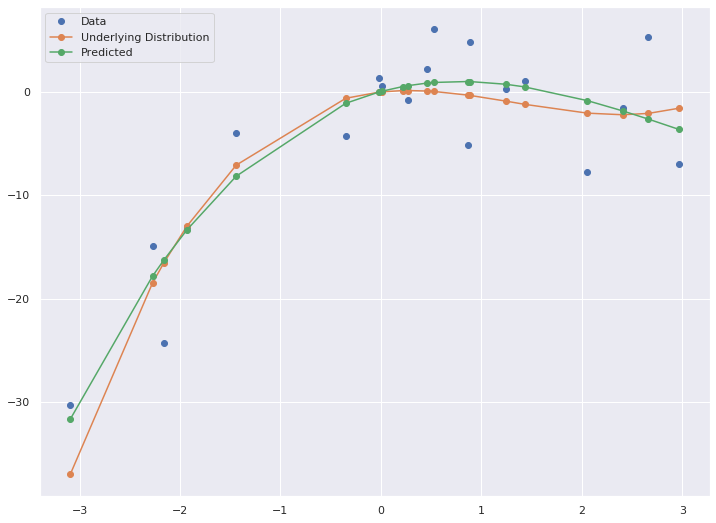

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.929493007090521


But how do we know when to stop, since we would not be knowing when to stop adding features in x.

In [0]:
X = np.vstack((X.T, xD**4, xD**5, xD**6, xD**7)).T

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X)), np.dot(X.T, y))

# prediction
yPred8Feature = yPred = np.dot(X, w)

In [0]:
w

array([[-2.64611130e-01],
       [ 8.28612458e+00],
       [-2.07703327e+00],
       [-6.35661778e+00],
       [-1.30720676e-02],
       [ 1.64293567e+00],
       [-2.08380043e-03],
       [-1.09229711e-01]])

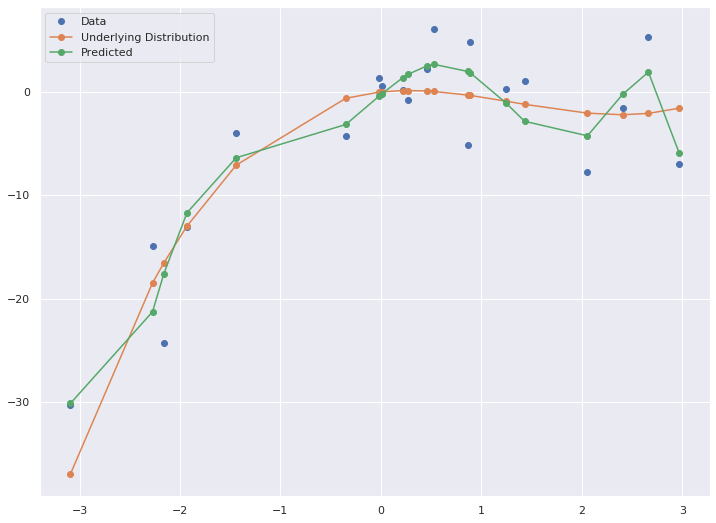

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

In [0]:
print('RMSE: ', rmse(yPred, y))

RMSE:  3.3097843019929725


Even though RMSE here (with much more higher features) is lower than previous case, we can see this Predicted Line is quite far from the Underlying distribution. This is called **Overfitting**.

When does the model overfits: when we have more features or comparitively less data for the model.

What exactly is overfitting:
It pays more attention to the noise of the data provided, in a sense trying to rotely memorize everything, 
without generalizing. 

Since we don't know when to stop adding features, what can be done:
- Solution is to work with a model or feature set that can slightly overfit your data, and then use techniques to prevent overfitting from happening.
The alternative gives us underfitting which we cannot fix unless you modify the feature set or model.

Options we have to prevent overfitting. Well there are many, most widely used ones are
- Using a validation set
- Regularization: add penalty on weights

In [0]:
λ = 10 # what is lambda: regularization parameter
f = 8 # number of features

In [0]:
# analytical solution
w = np.dot(np.linalg.inv(np.dot(X.T, X) + (λ)*np.identity(f)), np.dot(X.T, y))

# prediction
yPred8FeatRegu = yPred = np.dot(X, w)
w

array([[ 0.21326186],
       [ 0.40727946],
       [-0.46745243],
       [-0.31891582],
       [-0.51080301],
       [ 0.38864889],
       [ 0.03613141],
       [-0.03367748]])

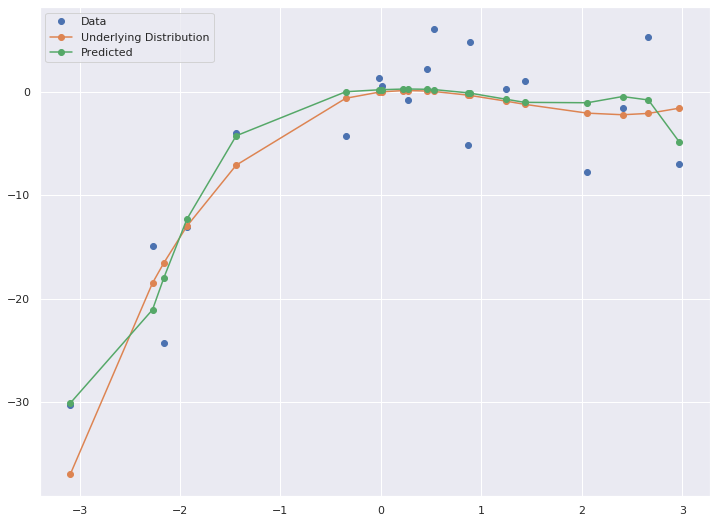

In [0]:
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPred, 'o-', label='Predicted')

plt.legend()
plt.show()

Can we know from the plot if the value of λ is optimal:

Somewhat but not exactly. 

To get the exact value of lambda you need to split dataset between training and testing. Then cycle over multiple values of lambda. The most optimum is the one which gives the lowest test error. 

What does low test error represent?

All models together:

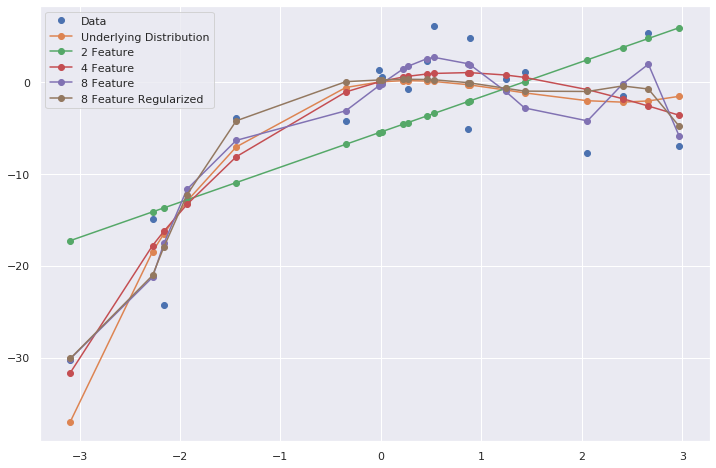

In [0]:
plt.figure(figsize=(12, 8))
plt.plot(xD, y, 'o', label='Data')
plt.plot(xD, yPerf, 'o-', label='Underlying Distribution')
plt.plot(xD, yPredLinear, 'o-', label='2 Feature')
plt.plot(xD, yPred4Feature, 'o-', label='4 Feature')
plt.plot(xD, yPred8Feature, 'o-', label='8 Feature')
plt.plot(xD, yPred8FeatRegu, 'o-', label='8 Feature Regularized')

plt.legend()
plt.show()

### Further Complex Multivariate Data

We will take the Housing dataset which contains information about different houses in Boston. This data was originally a part of UCI Machine Learning Repository and has been removed now. We can also access this data from the scikit-learn library. There are 506 samples and 13 feature variables in this dataset. The objective is to predict the value of prices of the house using the given features.

In [0]:
from sklearn.datasets import load_boston
dataset = load_boston()

In [0]:
print(dataset.keys())

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])


In [0]:
print(dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [0]:
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


We can see that the target value by the name MEDV is missing from the dataframe. It is present in dataset.target.
Let's add that to the df.

In [0]:
df['MEDV'] = dataset.target

Are there any null values in the dataset?

In [0]:
df.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

Even though there are none, it's a good practice to check.

#### Exploratory Data Analysis

We here use distplot method from the seaborn library, which is another popular graphing library for Python.

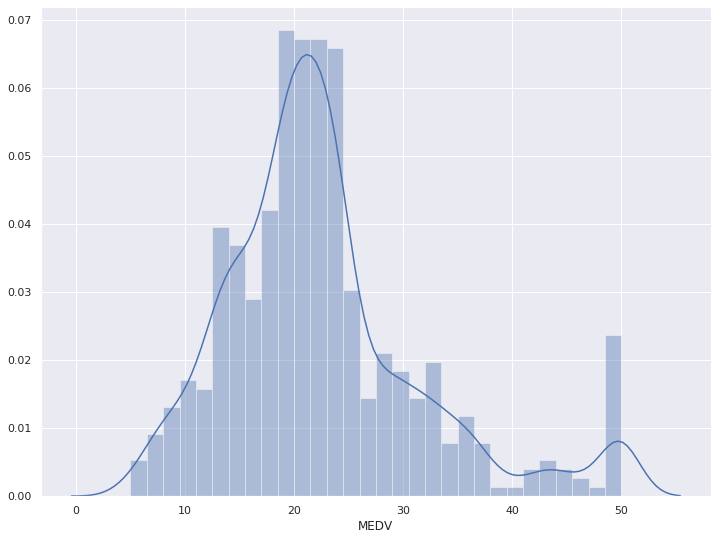

In [0]:
sns.set(rc={'figure.figsize':(12, 9)})
sns.distplot(df['MEDV'], bins=30)
plt.show()

We can see that it mostly normally distributed with a few outliers.

## Linear Regression - Assignment

We'll work with the above dataset for the assignment below. Create a blank notebook for the assignment.

### Question 1

1. Normalize the data using StandardScaler from sklearn. [0.5]
2. Split the multivariate data into training/validation data (20% validation data) and plot train error and validation error as a function of the lambda regularizer. [1]
3. What is the best lambda where the best fit occurs? Use this best lambda from here on out. [Note: You may be surprised by the best lambda here - this won't be the case for all datasets.] [1] **best lambda is 3**

In [0]:
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


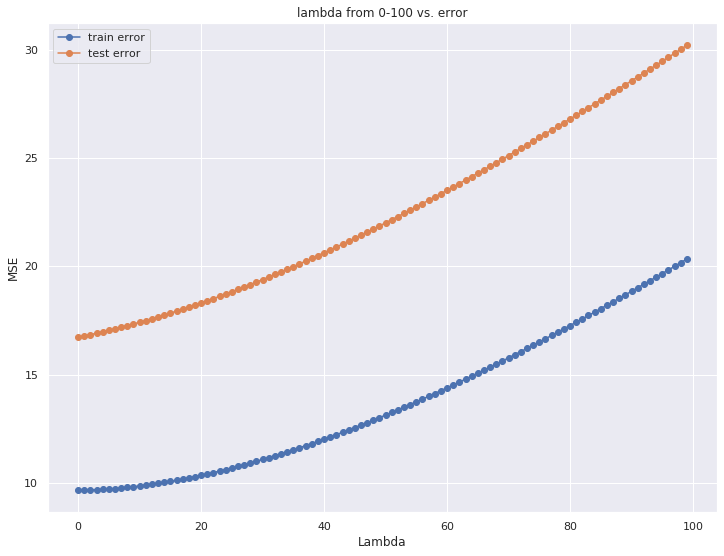

best lambda is: 0 
 with test error of: 16.724489998838294 
 with train error of: 9.663235101792857


In [0]:
#Normalize the data using StandardScaler
import sys
from sklearn.preprocessing import StandardScaler
np.set_printoptions(threshold=sys.maxsize)

#13-feature data frame
features = pd.DataFrame(dataset.data, columns=dataset.feature_names)

#Standarlize features
scaler = StandardScaler()
scaler.fit(features)
std_features = scaler.transform(features)

# display(std_features)

#Add a column of ones at the beginning
std_features = np.insert(std_features, 0, 1, axis=1)

# display(std_features)

#target dataframe
target = df['MEDV']

# print(std_features.shape)
# print(target.shape)

#split data
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(std_features, target, test_size=0.2, random_state=0)

# print(X_train)

#lambda regularzer
f = 14 # number of features (including a column of ones)

train_error_record = []
test_error_record = []

#define loss function
def mse(yPred,y):
  return 0.5*np.mean(np.square(yPred - y))  #error

for λ in range(100):
  # analytical solution
  w = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (λ)*np.identity(f)), np.dot(X_train.T, y_train))

  # prediction
  yPred = np.dot(X_train, w)
  #print('train_RMSE: ', rmse(yPred, y_train))
  train_error_record.append(mse(yPred, y_train))

  yPred_test = np.dot(X_test, w)
  #print('train_RMSE: ', rmse(yPred_test, y_test))
  test_error_record.append(mse(yPred_test, y_test))

plt.plot(train_error_record, 'o-', label='train error')
plt.plot(test_error_record, 'o-', label='test error')
#add title
plt.xlabel("Lambda")
plt.ylabel("MSE")
plt.title("lambda from 0-100 vs. error")
plt.legend()
plt.show()

print("best lambda is:", test_error_record.index(min(test_error_record)), "\n with test error of:",min(test_error_record),"\n with train error of:", train_error_record[test_error_record.index(min(test_error_record))] )

#Get analytical best w
w_analytical = np.dot(np.linalg.inv(np.dot(X_train.T, X_train) + (test_error_record.index(min(test_error_record)))*np.identity(f)), np.dot(X_train.T, y_train))

### Question 2

1. Derive the gradient of the $L_2$ regularized objective for Linear Regression, $\frac{\partial}{\partial \theta_j}J(\theta)$. Show your work (either by using in-line equations like we do here, or taking a picture of your work, and emdedding it in the notebook). [1]

<img src="http://drive.google.com/uc?id=1eO7LDJxbT7AV7sTqFBBN5i5_KPFlnEz5">

### Question 3

1. Implement batch gradient descent for linear regression using a fixed learning rate $\eta$ of 1e-2. [1.5]
**result shown below**
2. Run the gradient descent for a fixed number of epochs (based on convergence) and verify that the results closely approximate the matrix solution with the same lambda. [1]
**The graph shows that the final mse convergences with 3000 iterations (epochs), the w obtained from 3000 epochs with batch gradient desent method is very close to the w obtained from Q1 with analytical solution with same lambda = 0**

In [0]:
x = np.array([[1],[2]])
y = np.array([[2],[3]])
w = np.dot(np.linalg.inv(np.dot(x.T, x)), np.dot(x.T, y))
np.dot(x,w)

array([[1.6],
       [3.2]])

Gradient descent uses the equations for gradient derived above to find the direction in which we tinker the values of our parameters m and c. 
<img src="https://miro.medium.com/max/300/1*JDcHqFK8jLcgQu1cj2XuVQ.jpeg">

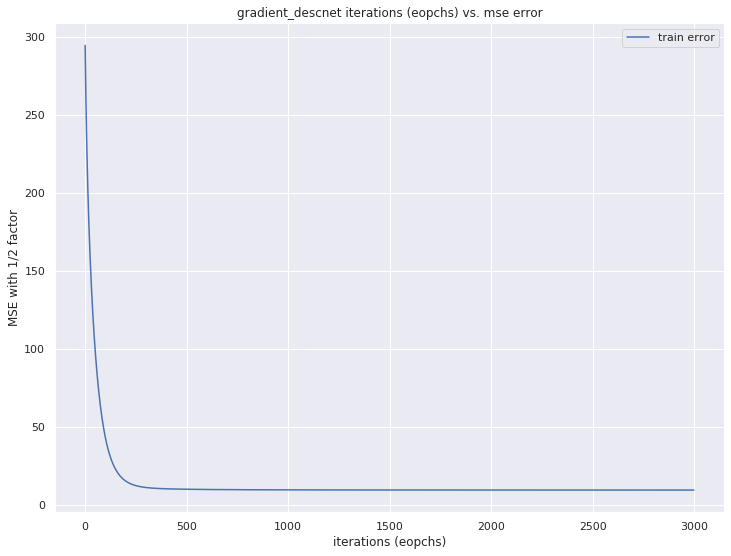

After 3000 eopchs, with learining rate of 0.01, the training result shows that MSE convergences.
==>The final trained w= 
 [22.4850775  -1.00398178  1.00866713 -0.0597074   0.60793907 -1.81129052
  2.6285693  -0.10949388 -2.89704739  1.87976742 -1.59455301 -2.24672165
  0.73664467 -3.50416704] 
==>with an train error of:  9.667854534262815
==>
Comparing with the analytical solution calculated from Question1: 
==>Analytical w = 
 [22.48035288 -1.02638248  1.0433458   0.03759363  0.59396238 -1.86651867
  2.60322635 -0.08776804 -2.91646482  2.12402208 -1.85033055 -2.26212378
  0.73967912 -3.5155841 ] 
==>with an train error of:  9.663235101792857
Conclusion:
After 3000 iteration, the final trained w matrix is very close to the analytical solution calculated from Question1, the mse for the trained matrix is also very close to the analytical solution


In [0]:
#batch gradient descnet using all examples

#epochs = One Epoch is when an ENTIRE dataset is passed forward and backward through 
#         the neural network only ONCE.

#define gradient Descent function
def gradient_descnet(X_train, y_train, w_init, L_r, iter_max, λ, m):
  w = w_init
  mse_train = []
  for i in range(iter_max):
    # print("iteration#",i)
    # print("x_train",X_train)
    y_train_pred = np.dot(X_train,w)
    # print("y_pred=",y_train_pred)
    #use the gradient calculated from previous question
    gradient = (1/m)*(np.dot(X_train.T,y_train_pred - y_train)) + np.dot(λ,w)
    w = w - L_r*gradient
    mse_train.append(mse(np.dot(X_train,w),y_train))
  return w, mse_train

#now performe gradient decnet:
#we define the initial theta be all ones, as there are 14 features, we make ones*14
w_init = np.ones(14)

#Learning rate is defined to be:
L_r = 0.01

#The designed maximun iteration is:
iter_max = 3000

#choosen best lambda is 0
λ = 0 

w_final,train_mse_record = gradient_descnet(X_train,y_train,w_init,L_r,iter_max,λ,y_train.size)

plt.plot(train_mse_record, '-', label='train error')
#add title
plt.xlabel("iterations (eopchs)")
plt.ylabel("MSE with 1/2 factor")
plt.title("gradient_descnet iterations (eopchs) vs. mse error")
plt.legend()
plt.show()

#display results
print("=======================================================")
print("After 3000 eopchs, with learining rate of 0.01, the training result shows that MSE convergences.")
print("==>The final trained w= \n", w_final, "\n==>with an train error of: ", train_mse_record[-1])
print("==>")
print("Comparing with the analytical solution calculated from Question1: \n==>Analytical w = \n", w_analytical,"\n==>with an train error of: ", train_error_record[0])

print("======================================================")
print("Conclusion:\nAfter 3000 iteration, the final trained w matrix is very close to the analytical solution calculated from Question1, the mse for the trained matrix is also very close to the analytical solution")


### Question 4

1. Plot training error performance vs. number of epochs as a function of learning rate $\eta$ for a range of values {1e-6, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1} with each $\eta$ being a different line. [1]

**shown in diagram**

For very low $\eta$, gradient descent should be slow to converge.  For very high $\eta$, the error might be very unstable (i.e., not decreasing on every epoch).

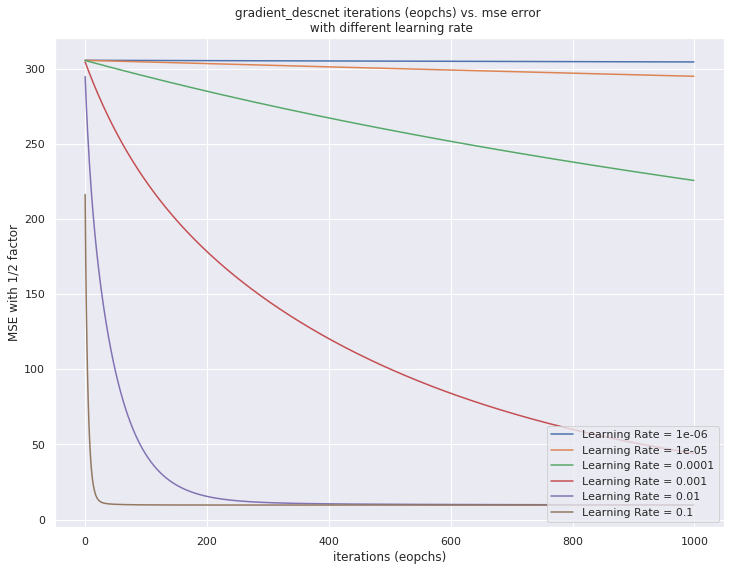

In [0]:
#The function has already been developed in Q4 with name gradient_descnet

#The designed maximun iteration is:
iter_max = 1000

#choosen best lambda is 0
λ = 0 

# now make the plot for different learning rates
for lr in [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]:
  #we define the initial theta be all ones, as there are 14 features, we make ones*14
  w_init = np.ones(14)
  w_final,train_mse_record = gradient_descnet(X_train,y_train,w_init,lr,iter_max,λ,y_train.size)
  plt.plot(train_mse_record, '-', label="Learning Rate = " + str(lr))

#add title
plt.xlabel("iterations (eopchs)")
plt.ylabel("MSE with 1/2 factor")
plt.title("gradient_descnet iterations (eopchs) vs. mse error \n with different learning rate")
plt.legend(loc= "lower right")
plt.show()
  


### Question 5

Implement a mini-batch version with a batch_size constant B.  When B=1, it is stochastic gradient descent.  When B=#train data points, it is full-batch.  Anywhere in between is mini-batch.  

1. Choose B=1, B=16, B=128, B=256, and B=#data points and plot training error as a function of "# of gradient updates" and also separately as a function of "wall-clock time" for each value of B. [2]**As shown in plot**

2. All lines should be on the same plot. Which B leads to fastest convergence in terms of #gradient updates and in terms of "wall-clock time"? [1]**From the graph of train error vs. #gradient updates, it seems like batch size = 16 (orange line) leads to fastest convergence. In terms of the train error vs. wall-clock time graph, batch size = 16 (orange line) also shows a fastest convergence (converges at around 0.05s) (line of batch size = 1 has missing parts from the beginning in this graph due to some unknown reasons and thus can not be compaired)**


In [0]:
#Develop the function:
# perm = np.random.permutation(404)
# print(perm)

def mini_batch_gradient_descent(X, y, w, lr, iteration, λ, bs):
  #bs=1 ==> stochastic gradient descent (single example)
  #1<bs<#train data points ==> mini-batch (a few examples)
  #bs=#train data points ==>full-batch (all examples)

  import time
  #1.Store the current time
  time_iter_start = time.time()

  '''
  X, y: training data
  w: weights
  lr: learning rate
  iteration: number of epochs
  λ: regularization parameter
  bs: batch size
  '''
  # m is the nunmber of data points
  m, n = X.shape
  # these are used to stored the cost and time
  costHistory = np.zeros(iteration)
  timeHistory = np.zeros(iteration)
  mse_train_vs_updates = []


  #######################    iteration start     ############################
  for i in range(iteration):
    '''
    1. Store the current time (should not be in the iteration???)
    2. Randomize your X and y. Make sure they are
    You may want to use np.random.permutation
    '''
    # Your code goes here

    # 2. Randomize your X and y.
    rand_perm = np.random.permutation(m) #random list with m number or samples
    X_after_perm = X[rand_perm]
    y_after_perm = y[rand_perm]

      #update the weight
      #######################    mini batch start     ############################
    for j in range(0, m, bs):
      '''
      1. Get the current mini-batch of X and Y
      2. Calculate the current prediction
      3. Update the weight (You may want to use np.dot)
      The update is similar to Q4
      '''
      # Your code goes here
      # 1. Get the current mini-batch of X and Y
      curr_mini_X = X_after_perm[j:j+bs,:]
      curr_mini_y = y_after_perm[j:j+bs,:]
      # 2. Calculate the current prediction
      curr_mini_pred_before = np.dot(curr_mini_X,w)
      # 3. Update the weight (You may want to use np.dot)
      curr_m = curr_mini_X.shape[0]
      gradient = (1/curr_m)*(np.dot(curr_mini_X.T,curr_mini_pred_before - curr_mini_y) + np.dot(λ,w))
      w = w - lr*gradient
      curr_mini_pred = np.dot(X,w)
      curr_mini_cost = mse(curr_mini_pred,y)
      mse_train_vs_updates.append(curr_mini_cost)
      #######################    mini batch end     ############################
    
    #######################  summerize  iteration      ############################
    '''
    1. calculate the current cost using w, X and y
    2. store the current time and calculate the time difference
    3. store time difference and cost in costHistory and timeHistory
    '''
    # Your code goes here
    # 1. calculate the current cost using w, X and y
    curr_iter_pred_y = np.dot(X,w)
    curr_iter_cost = mse(curr_iter_pred_y,y)
    # 2. store the current time and calculate the time difference
    time_iter_end = time.time()
    time_diff = time_iter_end - time_iter_start
    # 3. store time difference and cost in costHistory and timeHistory
    costHistory[i] = curr_iter_cost
    timeHistory[i] = time_diff
    #######################    iteration end     ############################

  return w, costHistory, timeHistory, mse_train_vs_updates

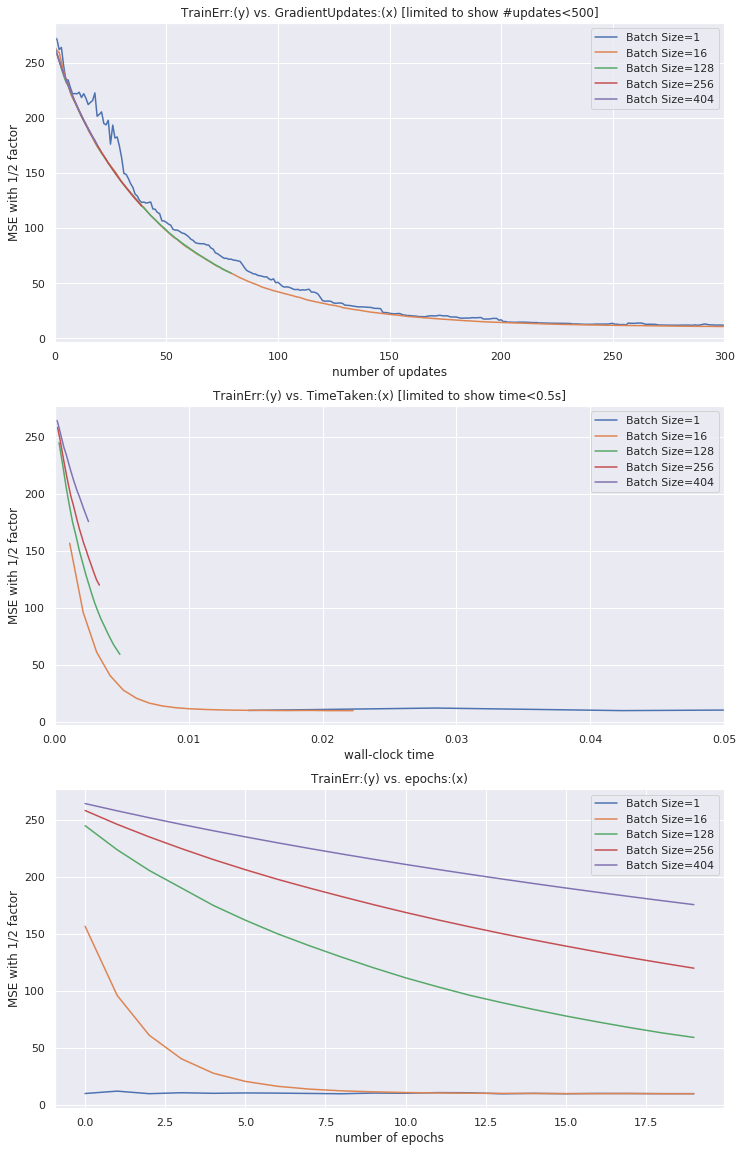

In [0]:
#Performe training

# Please run batch gradient descent with learning rate=0.01, and no of iterations=20
L_r = 0.01
iteration = 20
B = [1,16,128,256,404]  #total number of data is 404
λ = 0 #chosen from Q1
n=14

# For gradient descent, we initialize the weights using w = np.random.randn(n, 1) with np.random.seed(42)
np.random.seed(42)
w_init = np.random.randn(n, 1)

#Prepare the subplots
fig, ax = plt.subplots(3)

#Perform mini batch
for bs in np.array(B):
  w, costHistory, timeHistory, mse_train_vs_updates = mini_batch_gradient_descent(X_train, np.array(y_train).reshape(-1,1), w_init, L_r, iteration, λ, bs)
  #plot curves:
  #The first graph plots training error vs # of gradient updates (mse_train_vs_updates)
   #to make the time plot easier to read, eliminate the part where updates > 500
  ax[0].set_xlim([0, 300])
  ax[0].plot(mse_train_vs_updates, '-', label='Batch Size=' + str(bs))
  #the second plots training error vs time taken (costHistory,timeHistory)
  #to make the time plot easier to read, eliminate the part where time > 0.1s
  ax[1].set_xlim([0, 0.05])
  ax[1].plot(timeHistory,costHistory, '-', label='Batch Size=' + str(bs))
  # you may also plot a training error vs # of epochs
  # ax[2].set_xlim([0, 500])
  ax[2].plot(costHistory, '-', label='Batch Size=' + str(bs))

#add title
ax[0].legend(loc='upper right')
ax[0].set(ylabel='MSE with 1/2 factor', xlabel='number of updates',title='TrainErr:(y) vs. GradientUpdates:(x) [limited to show #updates<500]')

ax[1].legend(loc='upper right')
ax[1].set(ylabel='MSE with 1/2 factor', xlabel='wall-clock time',title='TrainErr:(y) vs. TimeTaken:(x) [limited to show time<0.5s]')

ax[2].legend(loc='upper right')
ax[2].set(ylabel='MSE with 1/2 factor', xlabel='number of epochs',title='TrainErr:(y) vs. epochs:(x)')

plt.subplots_adjust(top = 1.8 )


### Question 6

1. Switch to absolute error for loss but still use $L_2$ regularization. Derive the gradient for this case, $\frac{\partial}{\partial \theta_j}J(\theta)$. [1.5]
**Shown below**

2. Tune $\eta$ and B to obtain good performance (fast convergence to minimum error, but not noisy).  Is it easier to train with squared error or absolute error, why?  Show some plots that help you demonstrate this point and explain. [1]

**The choosen best learning rate and batch size for "train with squared error" is LR = 0.01 and Batch size = 16 (from previoud question ) and the choosen best learning rate and batch size for "train with absolute error" is LR = 0.1 and Batch size = 16 (process shown below). After plotting the training record of them from same plot (velidate using MSE), it is shown that the training with squared error has a faster convergence then training with absolute error (see plots and the end)**

<img src='https://drive.google.com/uc?id=1_ev_0LQLUDKH4cFHaViheP0uWEK_HlBf'>

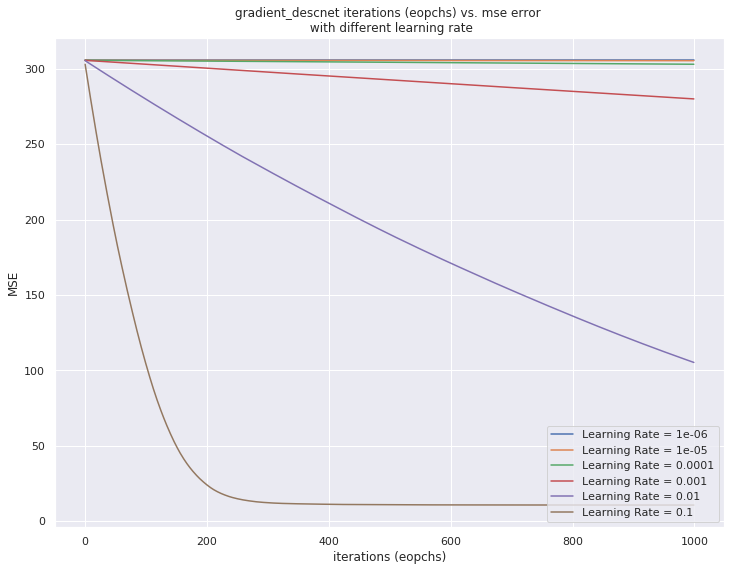

In [0]:
#####################################################################
#############      Tune value of  η           #######################
#####################################################################


#New gradient descnet function with abs
def gradient_descnet_abs(X_train, y_train, w_init, L_r, iter_max, λ, m):
  w = w_init
  mse_train = []
  for i in range(iter_max):
    # print("iteration#",i)
    # print("x_train",X_train)
    y_train_pred = np.dot(X_train,w)
    # print("y_pred=",y_train_pred)
    y_train_pred = np.array(y_train_pred).reshape(-1,1)
    y_train = np.array(y_train).reshape(-1,1)
    diff_array = np.subtract(y_train_pred, y_train)
    sign_array = np.sign(diff_array)
    #use the gradient calculated from previous question
    gradient = (1/m)*(np.dot(X_train.T,sign_array)) + np.dot(λ,w)
    w = w - L_r*gradient
    mse_train.append(mse(np.dot(X_train,w),y_train))
  return w, mse_train

#The function has already been developed in Q4 with name gradient_descnet

#The designed maximun iteration is:
iter_max = 1000

#choosen best lambda is 0
λ = 0 

# now make the plot for different learning rates
for lr in [1e-6,1e-5,1e-4,1e-3,1e-2,1e-1]:
  #we define the initial theta be all ones, as there are 14 features, we make ones*14
  w_init = np.ones(14)
  w_init = w_init.reshape(-1,1)
  w_final,train_mse_record = gradient_descnet_abs(X_train,y_train,w_init,lr,iter_max,λ,y_train.size)
  plt.plot(train_mse_record, '-', label="Learning Rate = " + str(lr))

#add title
plt.xlabel("iterations (eopchs)")
plt.ylabel("MSE")
plt.title("gradient_descnet iterations (eopchs) vs. mse error \n with different learning rate")
plt.legend(loc= "lower right")
plt.show()

**===>Picking the Learning Rate<===**

**By observing the above plot, Learning Rate = 0.1 performes the fastest convergence thus we would like to choose Learning Rate = 0.1**

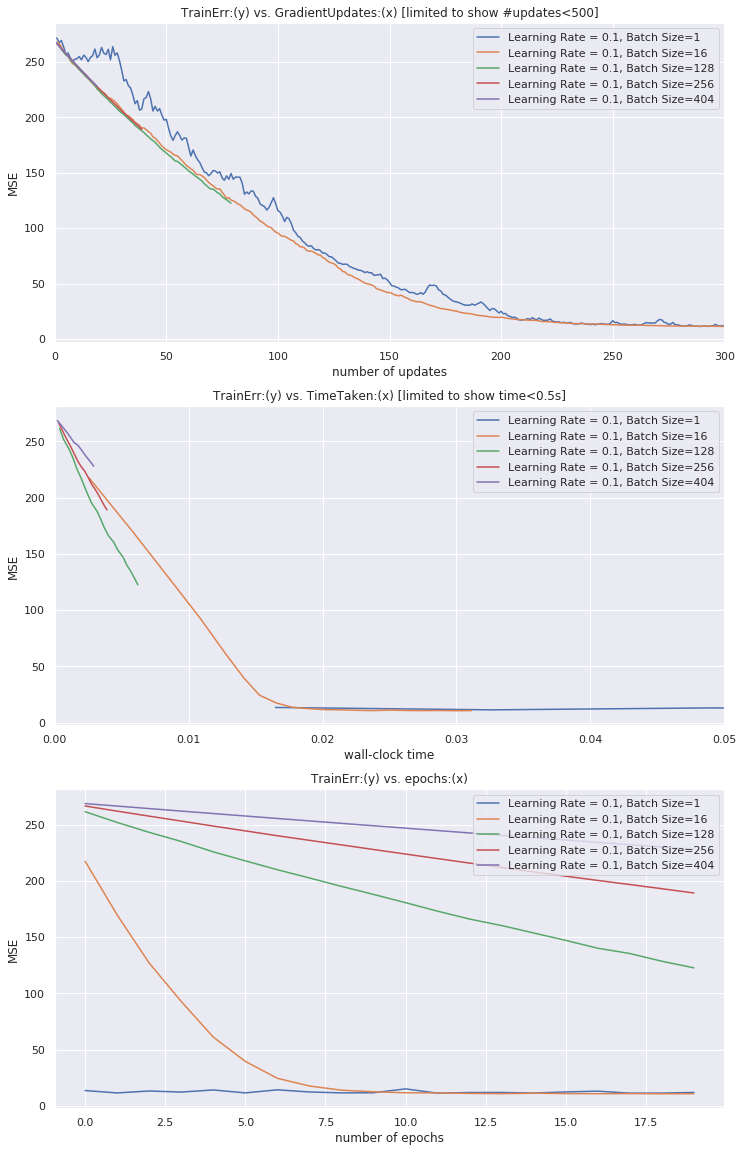

In [0]:
#####################################################################
#############      Tune value of  B           #######################
#####################################################################
  

#Develop the new gradient descent function with abs:
def mini_batch_gradient_descent_abs(X, y, w, lr, iteration, λ, bs):
  #bs=1 ==> stochastic gradient descent (single example)
  #1<bs<#train data points ==> mini-batch (a few examples)
  #bs=#train data points ==>full-batch (all examples)

  import time
  #1.Store the current time
  time_iter_start = time.time()

  '''
  X, y: training data
  w: weights
  lr: learning rate
  iteration: number of epochs
  λ: regularization parameter
  bs: batch size
  '''
  # m is the nunmber of data points
  m, n = X.shape
  # these are used to stored the cost and time
  costHistory = np.zeros(iteration)
  timeHistory = np.zeros(iteration)
  mse_train_vs_updates = []


  #######################    iteration start     ############################
  for i in range(iteration):
    '''
    1. Store the current time (should not be in the iteration???)
    2. Randomize your X and y. Make sure they are
    You may want to use np.random.permutation
    '''
    # Your code goes here

    # 2. Randomize your X and y.
    rand_perm = np.random.permutation(m) #random list with m number or samples
    X_after_perm = X[rand_perm]
    y_after_perm = y[rand_perm]

      #update the weight
      #######################    mini batch start     ############################
    for j in range(0, m, bs):
      '''
      1. Get the current mini-batch of X and Y
      2. Calculate the current prediction
      3. Update the weight (You may want to use np.dot)
      The update is similar to Q4
      '''
      # Your code goes here
      # 1. Get the current mini-batch of X and Y
      curr_mini_X = X_after_perm[j:j+bs,:]
      curr_mini_y = y_after_perm[j:j+bs,:]
      # 2. Calculate the current prediction
      curr_mini_pred_before = np.dot(curr_mini_X,w)
      # 3. Update the weight (You may want to use np.dot)
      curr_m = curr_mini_X.shape[0]
      #find the sign for the absolute function
      curr_mini_pred_before = np.array(curr_mini_pred_before).reshape(-1,1)
      curr_mini_y = np.array(curr_mini_y).reshape(-1,1)
      diff_array = np.subtract(curr_mini_pred_before, curr_mini_y)
      sign_array = np.sign(diff_array)
      # print(sign_array)
      gradient = (1/curr_m)*(np.dot(curr_mini_X.T,sign_array) + np.dot(λ,w))
      w = w - lr*gradient
      curr_mini_pred = np.dot(X,w)
      curr_mini_cost = mse(curr_mini_pred,y)
      mse_train_vs_updates.append(curr_mini_cost)
      #######################    mini batch end     ############################
    
    #######################  summerize  iteration      ############################
    '''
    1. calculate the current cost using w, X and y
    2. store the current time and calculate the time difference
    3. store time difference and cost in costHistory and timeHistory
    '''
    # Your code goes here
    # 1. calculate the current cost using w, X and y
    curr_iter_pred_y = np.dot(X,w)
    curr_iter_cost = mse(curr_iter_pred_y,y)
    # 2. store the current time and calculate the time difference
    time_iter_end = time.time()
    time_diff = time_iter_end - time_iter_start
    # 3. store time difference and cost in costHistory and timeHistory
    costHistory[i] = curr_iter_cost
    timeHistory[i] = time_diff
    #######################    iteration end     ############################

  return w, costHistory, timeHistory, mse_train_vs_updates


###################   performe training     #####################################
L_r = 0.1   #the best learning rate is choosen to be 0.1
iteration = 20
B = [1,16,128,256,404]  #total number of data is 404
λ = 0 #chosen from Q1
n=14

# For gradient descent, we initialize the weights using w = np.random.randn(n, 1) with np.random.seed(42)
np.random.seed(42)
w_init = np.random.randn(n, 1)

#Prepare the subplots
fig, ax = plt.subplots(3)

#Perform mini batch
for bs in np.array(B):
  w, costHistory, timeHistory, mse_train_vs_updates = mini_batch_gradient_descent_abs(X_train, np.array(y_train).reshape(-1,1), w_init, L_r, iteration, λ, bs)
  #plot curves:
  #The first graph plots training error vs # of gradient updates (mse_train_vs_updates)
   #to make the time plot easier to read, eliminate the part where updates > 500
  ax[0].set_xlim([0, 300])
  ax[0].plot(mse_train_vs_updates, '-', label='Learning Rate = 0.1, Batch Size=' + str(bs))
  #the second plots training error vs time taken (costHistory,timeHistory)
  #to make the time plot easier to read, eliminate the part where time > 0.1s
  ax[1].set_xlim([0, 0.05])
  ax[1].plot(timeHistory,costHistory, '-', label='Learning Rate = 0.1, Batch Size=' + str(bs))
  # you may also plot a training error vs # of epochs
  # ax[2].set_xlim([0, 500])
  ax[2].plot(costHistory, '-', label='Learning Rate = 0.1, Batch Size=' + str(bs))

#add title
ax[0].legend(loc='upper right')
ax[0].set(ylabel='MSE', xlabel='number of updates',title='TrainErr:(y) vs. GradientUpdates:(x) [limited to show #updates<500]')

ax[1].legend(loc='upper right')
ax[1].set(ylabel='MSE', xlabel='wall-clock time',title='TrainErr:(y) vs. TimeTaken:(x) [limited to show time<0.5s]')

ax[2].legend(loc='upper right')
ax[2].set(ylabel='MSE', xlabel='number of epochs',title='TrainErr:(y) vs. epochs:(x)')

plt.subplots_adjust(top = 1.8 )

**=======>Picking the Batch size <=======**


**By observing the plots or MAE vs. updates/wall-clock time/epoches, we can see that when batch size =16 the curve congerges quickly, (batch size =1 also converges quickly but it shows too much fluctuation (noisy), and thus batch size =16 is better)**

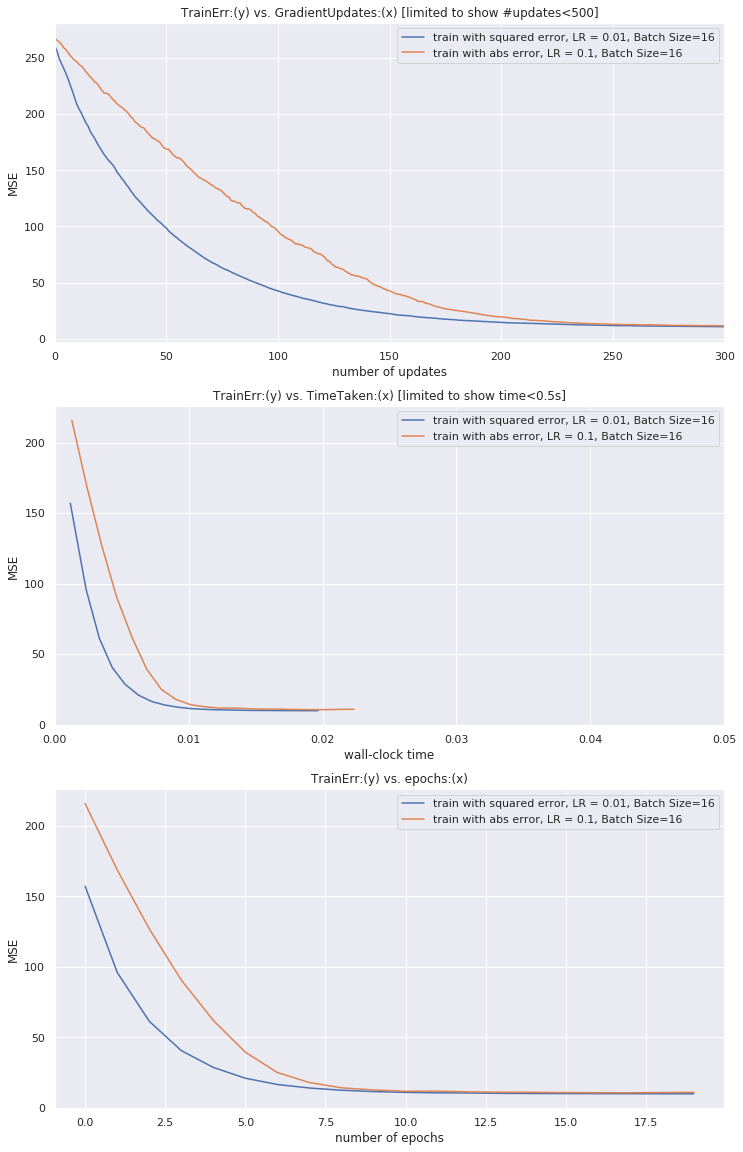

In [0]:
#####################################################################
#############      Compair the MSE and ASE            ###############
#####################################################################

#Prepare the subplots
fig, ax = plt.subplots(3)

#use MSE===========================================================================
#choose best B = 16 and lr = 0.01
L_r = 0.01   #the best learning rate is choosen to be 0.1
iteration = 20
B = 16 #16 is chossen to be best batch size from MSE
λ = 0 #chosen from Q1
n=14
w_mse, costHistory_mse, timeHistory_mse, mse_train_vs_updates = mini_batch_gradient_descent(X_train, np.array(y_train).reshape(-1,1), w_init, L_r, iteration, λ, B)

#plot curves:
#The first graph plots training error vs # of gradient updates (mse_train_vs_updates)
#to make the time plot easier to read, eliminate the part where updates > 500
ax[0].set_xlim([0, 300])
ax[0].plot(mse_train_vs_updates, '-', label='train with squared error, LR = 0.01, Batch Size=' + str(B))
#the second plots training error vs time taken (costHistory,timeHistory)
#to make the time plot easier to read, eliminate the part where time > 0.1s
ax[1].set_xlim([0, 0.05])
ax[1].plot(timeHistory_mse,costHistory_mse, '-', label='train with squared error, LR = 0.01, Batch Size=' + str(B))
# you may also plot a training error vs # of epochs
# ax[2].set_xlim([0, 500])
ax[2].plot(costHistory_mse, '-', label='train with squared error, LR = 0.01, Batch Size=' + str(B))

#use ASE ========================================================================
#choose best B = 16 and lr = 0.1
L_r = 0.1   #the best learning rate is choosen to be 0.1
iteration = 20
B = 16   #16 is chossen to be best batch size from ASE
λ = 0 #chosen from Q1
n=14
w_ase, costHistory_ase, timeHistory_ase, ase_train_vs_updates = mini_batch_gradient_descent_abs(X_train, np.array(y_train).reshape(-1,1), w_init, L_r, iteration, λ, B)

#plot curves:
#The first graph plots training error vs # of gradient updates (mse_train_vs_updates)
#to make the time plot easier to read, eliminate the part where updates > 500
ax[0].set_xlim([0, 300])
ax[0].plot(ase_train_vs_updates, '-', label='train with abs error, LR = 0.1, Batch Size=' + str(B))
#the second plots training error vs time taken (costHistory,timeHistory)
#to make the time plot easier to read, eliminate the part where time > 0.1s
ax[1].set_xlim([0, 0.05])
ax[1].plot(timeHistory_ase,costHistory_ase, '-', label='train with abs error, LR = 0.1, Batch Size=' + str(B))
# you may also plot a training error vs # of epochs
# ax[2].set_xlim([0, 500])
ax[2].plot(costHistory_ase, '-', label='train with abs error, LR = 0.1, Batch Size=' + str(B))

#add title
ax[0].legend(loc='upper right')
ax[0].set(ylabel='MSE', xlabel='number of updates',title='TrainErr:(y) vs. GradientUpdates:(x) [limited to show #updates<500]')

ax[1].legend(loc='upper right')
ax[1].set(ylabel='MSE', xlabel='wall-clock time',title='TrainErr:(y) vs. TimeTaken:(x) [limited to show time<0.5s]')

ax[2].legend(loc='upper right')
ax[2].set(ylabel='MSE', xlabel='number of epochs',title='TrainErr:(y) vs. epochs:(x)')

plt.subplots_adjust(top = 1.8 )


**Conclusion:**
**The choosen best learning rate and batch size for "train with squared error" is LR = 0.01 and Batch size = 16 (from previoud question ) and the choosen best learning rate and batch size for "train with absolute error" is LR = 0.1 and Batch size = 16 (process shown below). After plotting the training record of them from same plot (velidate using MSE), it is shown that the training with squared error has a faster convergence then training with absolute error (see plots shown above)**

### Question 7 (Optional)

1. Does the model perform better if polynomial features are added (Use sklearn.preprocessing.PolynomialFeatures to test it out).


2. Does the optimal value of λ (regularization constant) change with this new set of features added.

## References

Linear Regression:
1. https://sebastianraschka.com/faq/docs/closed-form-vs-gd.html

Gradient Descent (images and equations):
1. https://towardsdatascience.com/linear-regression-using-gradient-descent-97a6c8700931
2. https://towardsdatascience.com/linear-regression-using-python-b136c91bf0a2

Author: Parth Jaggi